# IMB Allgather performance comparison

In [35]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,4)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})

In [36]:
import sys
sys.path.append('../../../python-modules')

In [37]:
from utilities import filemanip

In [38]:
from synthanalysis import imb

In [39]:
benchmark = "Allgather"
systems = ['ARCHER_CrayMPICH774',
           'ARCHER2_CrayMPICH8015',
           'Cirrus_IMPI18',
           'Cirrus_MPT218',
           'Fulhame_OMPI4',
           'Fulhame_MVAPICH231',
           'Fulhame_HMPT220',
           'Isambard_CrayMPICH776',
           'Tesseract_IMPI181',
           'Peta4-Skylake_IMPI193',
           'Athena_IMPI182']
nodelist = [1, 2, 4, 8, 16, 32]
imb_perf = []
for system in systems:
    tdict = {}
    for nodes in nodelist:
        stem = 'IMB_{0}_{1}nodes'.format(benchmark, nodes)
        imbfiles = filemanip.get_filelist('../results/' + system, stem)
        if len(imbfiles) > 0:
            tlist = imb.get_perf_dict(imbfiles[0], nodes, system)
            imb_perf.extend(tlist)
imb_df = pd.DataFrame(imb_perf)
imb.get_perf_stats(imb_df)

                                                    Perf             \
                                                     min     median   
System                Nodes Processes Size                            
ARCHER2_CrayMPICH8015 1     128       0             0.05       0.05   
                                      1             7.24       7.24   
                                      2             7.41       7.41   
                                      4            13.24      13.24   
                                      8            14.03      14.03   
...                                                  ...        ...   
Tesseract_IMPI181     32    768       65536     31159.45   31159.45   
                                      131072    57643.32   57643.32   
                                      262144   117344.52  117344.52   
                                      524288   226638.34  226638.34   
                                      1048576  449698.75  449698.75   

     

/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:41: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


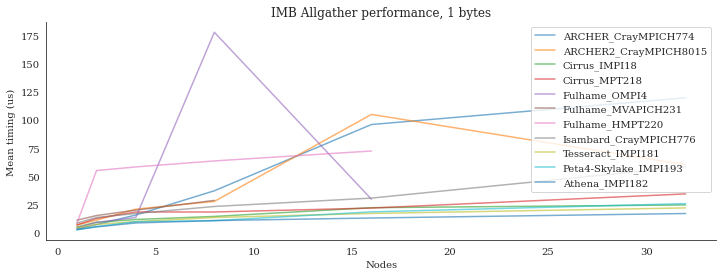

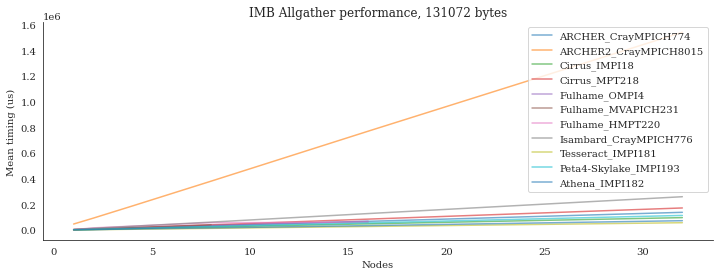

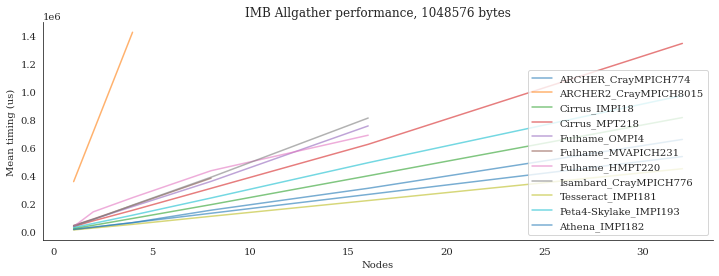

In [40]:
sizelist = [1, 131072, 1048576]
# Plot performance
for size in sizelist:
    plt.clf()
    for system in systems:
        nodes, perf = imb.get_node_scaling_df(imb_df, system, size, 'max')
        plt.plot(nodes, perf, label=f'{system}', alpha=0.6)
    sns.despine()
    plt.xlabel("Nodes")
    plt.ylabel("Mean timing (us)")
    plt.title(f'IMB {benchmark} performance, {size} bytes')
    plt.legend(loc='best')
    plt.show()
    

/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:61: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


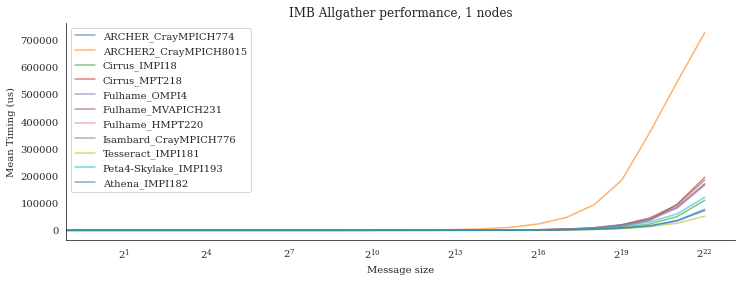

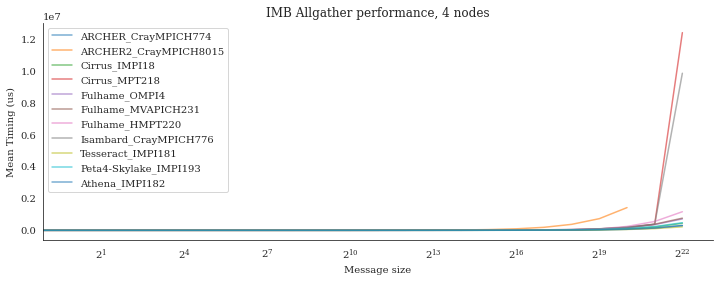

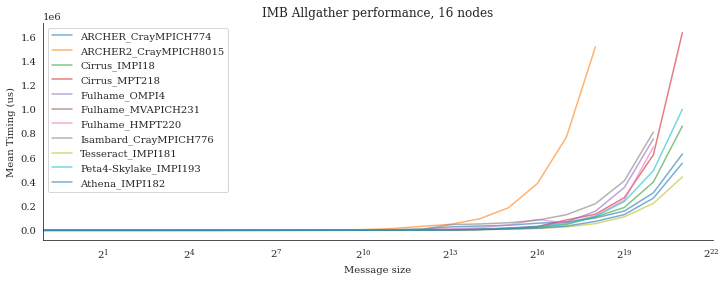

In [41]:
nodelist = [1, 4, 16]
# Plot performance
for node in nodelist:
    plt.clf()
    for system in systems:
        sizes, perf = imb.get_size_scaling_df(imb_df, system, node, 'max')
        plt.plot(sizes, perf, label=f'{system}', alpha=0.6)
    sns.despine()
    plt.xscale('log', base=2)
    plt.xlabel("Message size")
    plt.ylabel("Mean Timing (us)")
    plt.title(f'IMB {benchmark} performance, {node} nodes')
    plt.legend(loc='best')
    plt.show()

In [42]:
# Compute performance ratio
imb.get_perf_ratio(imb_df, 'ARCHER_CrayMPICH774', systems, 'max', invert=True)

ARCHER_CrayMPICH774 performance ratio to ARCHER_CrayMPICH774 performance
            #nodes
      #bytes         1         2         4         8        16        32
           0     1.000     1.000     1.000     1.000     1.000     1.000
           1     1.000     1.000     1.000     1.000     1.000     1.000
           2     1.000     1.000     1.000     1.000     1.000     1.000
           4     1.000     1.000     1.000     1.000     1.000     1.000
           8     1.000     1.000     1.000     1.000     1.000     1.000
          16     1.000     1.000     1.000     1.000     1.000     1.000
          32     1.000     1.000     1.000     1.000     1.000     1.000
          64     1.000     1.000     1.000     1.000     1.000     1.000
         128     1.000     1.000     1.000     1.000     1.000     1.000
         256     1.000     1.000     1.000     1.000     1.000     1.000
         512     1.000     1.000     1.000     1.000     1.000     1.000
        1024     1.000     1.000

       16384     0.248     0.339     1.536     2.713     3.279
       32768     0.241     0.275     1.257     2.028     2.232
       65536     0.223     0.379     0.912     1.458     1.743
      131072     0.395     0.452     0.634     1.015     0.985
      262144     0.407     0.398     0.449     0.603     0.653
      524288     0.369     0.351     0.365     0.433     0.450
     1048576     0.381     0.358     0.361     0.428     0.411
     2097152     0.423     0.395     0.394     0.422
     4194304     0.452     0.425     0.427
Fulhame_MVAPICH231 performance ratio to ARCHER_CrayMPICH774 performance
            #nodes
      #bytes         1         2         4         8        16        32
           0     0.007     0.005     0.004     0.002
           1     0.320     0.486     0.787     1.294
           2     0.332     0.437     0.653     1.296
           4     0.326     0.457     0.717     0.853
           8     0.135     0.431     0.739     0.765
          16     0.222     0.383  

        8192     0.656     1.013     4.594     7.530     8.178     8.265
       16384     0.543     0.650     2.571     4.056     4.814     5.184
       32768     0.402     0.437     1.697     2.552     2.835     2.885
       65536     0.348     0.476     1.102     1.682     2.017     1.929
      131072     0.506     0.557     0.788     1.264     1.205     1.211
      262144     0.539     0.540     0.624     0.824     0.902     0.902
      524288     0.510     0.514     0.545     0.639     0.667     0.701
     1048576     0.539     0.540     0.549     0.639     0.629     0.678
     2097152     0.599     0.582     0.594     0.649     0.630
     4194304     0.637     0.623     0.639     0.643
Athena_IMPI182 performance ratio to ARCHER_CrayMPICH774 performance
            #nodes
      #bytes         1         2         4         8        16        32
           0     0.778     1.000     1.000     1.000     1.000     0.875
           1     1.166     1.375     1.784     3.384     7.190     